<a href="https://colab.research.google.com/github/jhonysmf/MVP_ML_jhonysmf/blob/main/MVP_ML__Jhonys_Machado_de_Freitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Machine Learning
## Aluno: Jhonys Machado de Freitas

O dataset escolhido foi o "[Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data)" disponibilizado pelo kaggle. Nesse dataset estão disponíveis informações de exames e condições médicas de diversos pacientes, bem com informações sobre episódios de ataques cardíacos ou não. Portanto os dados podem ser usados para o treinamento de um modelo de ML para a predição de um possível ataque cardíaco, baseado nas condições clínicas de um paciente.

A hipótese que deseja-se verificar, ou seja, a classe alvo do modelo de ML será a coluna (Resultado) do dataset. Nesta coluna estão as informações se o paciente teve algum epísodio de ataque cardícao (1) ou não (0).

As informações de cada procedimento, tendo como base o checklist sugerido para o MVP, serão inseridas previamente às respectivas células de códigos.

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings('ignore')

# Imports necessários
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

O dataset foi baixado do kaggle e inserido no espaço pessoal do gitgub em formato público.

Como se trata de uma base de dados relativamente antiga, e específica da área médica, para melhor interpretação e aplicação do modelo assim como a inserção de dados para uma possível aplicação do modelo criado, todos os nomes das colunas foram traduzidos ou adaptados para o português.

In [3]:
# Informa a URL de importação do dataset

url = 'https://raw.githubusercontent.com/jhonysmf/teste_MVP_ML_jhonysmf/main/heart.csv'

# Lê o arquivo
dados = pd.read_csv(url, delimiter=',')

#Mudando o nome das colunas para facilitar a interpretação

column_names_map = {
    'age': 'Idade',
    'sex': 'Sexo', #0 = feminino, 1 = masculino
    'cp':'Tipo dor no peito' , #variando de 1 a 4 (ver fonte para maiores informações)
    'trtbps':'Pres no repouso', #medida em mmHG
    'chol':'Colesterol', #medida do colesrol em mg/dl
    'fbs':'Açucar no sangue', #> 120 mg/dl (1 = true; 0 = false)
    'restecg':'Eletro em repouso', #variando de 1 a 4 (ver fonte para maiores informações)
    'thalachh':'FCM', #Frequencia máxima cardíaca
    'exng':'Angina por exerc', #Angina induzida por exercício (0: não, 1: sim)
    'oldpeak':'DepressaoST por exerc', #Depressão ST induzida por exercício em relação ao repouso (unidade -> depressão)
    'slp':'Slp ST', #Inclinação do segmento ST de pico do exercício (0: ascendente, 1: plano, 2: descendente)
    'caa':'Vasos principais', # Número de vasos principais (0-4)
    'thall':'Talassemia', #teste de estresse de tálio (0: Normal, 1: Defeito fixo, 2: Defeito reversível, 3: Não descrito)
    'output':'Resultado' #0 = baixa chance de ataque cardíaco 1 = alta chance de ataque cardíaco)
}

dados.rename(columns=column_names_map, inplace=True)

# Mostra as primeiras linhas do dataset
dados.head()

,Idade,Sexo,Tipo dor no peito,Pres no repouso,Colesterol,Açucar no sangue,Eletro em repouso,FCM,Angina por exerc,DepressaoST por exerc,Slp ST,Vasos principais,Talassemia,Resultado
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Informações e limpeza do Dataset. Checagem do tamanho, informações duplicadas.

Com o dataset carregado foi feito a limpeza dos dados duplicados ou dados nulos (null).

Também foram avaliadas as informações gerais dos dados, como número de instâncias, médias das classes etc.

Pode-se obter informações importantes como, média das idades dos pacientes (54 anos), intervalo de idade dos dados coletados (29 a 77 anos) e sendo a maioria do sexo masculino (média col. sexo > 0.5), por exemplo.


In [4]:
print('(Num linhas,Num colunas) =',dados.shape) #numero de linhas e colunas

print('Numero de dados duplicados:',dados.duplicated().sum())

dados.drop_duplicates(inplace=True) #excluindo dados duplicados
print('Dados inválidos por coluna:\n',
dados.isnull().sum()) # números de valores inválidos em cada coluna
dados.describe()


(Num linhas,Num colunas) = (303, 14)
Numero de dados duplicados: 1
Dados inválidos por coluna:
 Idade                    0
Sexo                     0
Tipo dor no peito        0
Pres no repouso          0
Colesterol               0
Açucar no sangue         0
Eletro em repouso        0
FCM                      0
Angina por exerc         0
DepressaoST por exerc    0
Slp ST                   0
Vasos principais         0
Talassemia               0
Resultado                0
dtype: int64


,Idade,Sexo,Tipo dor no peito,Pres no repouso,Colesterol,Açucar no sangue,Eletro em repouso,FCM,Angina por exerc,DepressaoST por exerc,Slp ST,Vasos principais,Talassemia,Resultado
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Separação em conjunto de treino e conjunto de teste com holdout

Para a separação do conjunto de treino e teste foram consideradas as proporcões de 80:20 (% treino:teste).

Foi feita também a validação cruzada com estratificação para melhor fitting do modelo, uma vez que esse tipo de validação não impacta no tempo de execução do modelo, dado o tamanho do dataset (302 instâncias).

**Como parâmetro de validação do modelo será usado o valor de *recall*, visto a natureza da previsão a ser feita pelo modelo, ou seja, a previsão de um possível ataque cardíaco, portanto resultados falso negativos devem ser minimizados.**

In [5]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 11 # semente aleatória

# Separação em conjuntos de treino e teste
array = dados.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'recall'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

Foram testados todos os algoritmos e essembles vistos durante o curso para prática e também melhor inferência do modelo a ser utilizado, tendo sempre como parâmetro de avalição o máximo valor de recall.

Neste ponto também foram feitos testes com tratamentos dos dados como padronização e normalização, bem como a aplicação em pipelines com todos os algoritmos testados.

Para avaliação do melhor algoritmo a ser utilizado são apresentados os valores de recall, bem como os respectivos boxplots obtidos para cada pipeline testado.

### Criação e avaliação de modelos: linha base

LR: 0.901648 (0.095499)
KNN: 0.724176 (0.105683)
CART: 0.673626 (0.124428)
NB: 0.856044 (0.108168)
SVM: 0.831868 (0.089956)
Bagging: 0.824725 (0.168251)
RF: 0.848352 (0.135285)
ET: 0.847802 (0.118203)
Ada: 0.809890 (0.090090)
GB: 0.801648 (0.133833)
Voting: 0.878022 (0.104071)


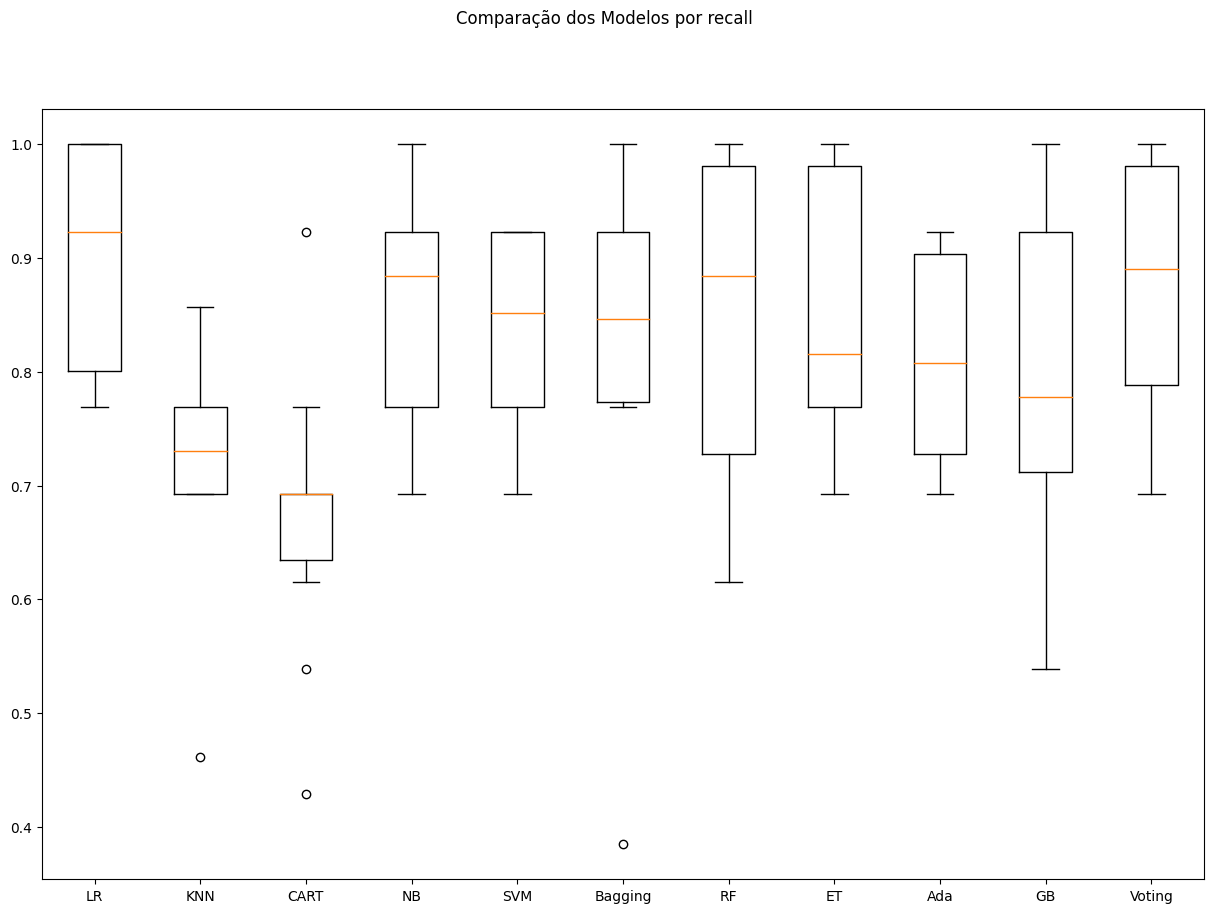

In [6]:
np.random.seed(11) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos por recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.902 (0.095)
KNN-orig: 0.724 (0.106)
CART-orig: 0.674 (0.124)
NB-orig: 0.856 (0.108)
SVM-orig: 0.832 (0.090)
Bag-orig: 0.825 (0.168)
RF-orig: 0.848 (0.135)
ET-orig: 0.848 (0.118)
Ada-orig: 0.810 (0.090)
GB-orig: 0.802 (0.134)
Vot-orig: 0.878 (0.104)
LR-padr: 0.879 (0.103)
KNN-padr: 0.902 (0.089)
CART-padr: 0.703 (0.098)
NB-padr: 0.856 (0.108)
SVM-padr: 0.893 (0.098)
Bag-padr: 0.818 (0.163)
RF-padr: 0.893 (0.104)
ET-padr: 0.848 (0.137)
Ada-padr: 0.810 (0.090)
GB-padr: 0.795 (0.136)
Vot-padr: 0.878 (0.110)
LR-norm: 0.885 (0.110)
KNN-norm: 0.854 (0.094)
CART-norm: 0.710 (0.111)
NB-norm: 0.856 (0.108)
SVM-norm: 0.916 (0.063)
Bag-norm: 0.818 (0.141)
RF-norm: 0.841 (0.150)
ET-norm: 0.847 (0.129)
Ada-norm: 0.810 (0.090)
GB-norm: 0.802 (0.134)
Vot-norm: 0.893 (0.085)


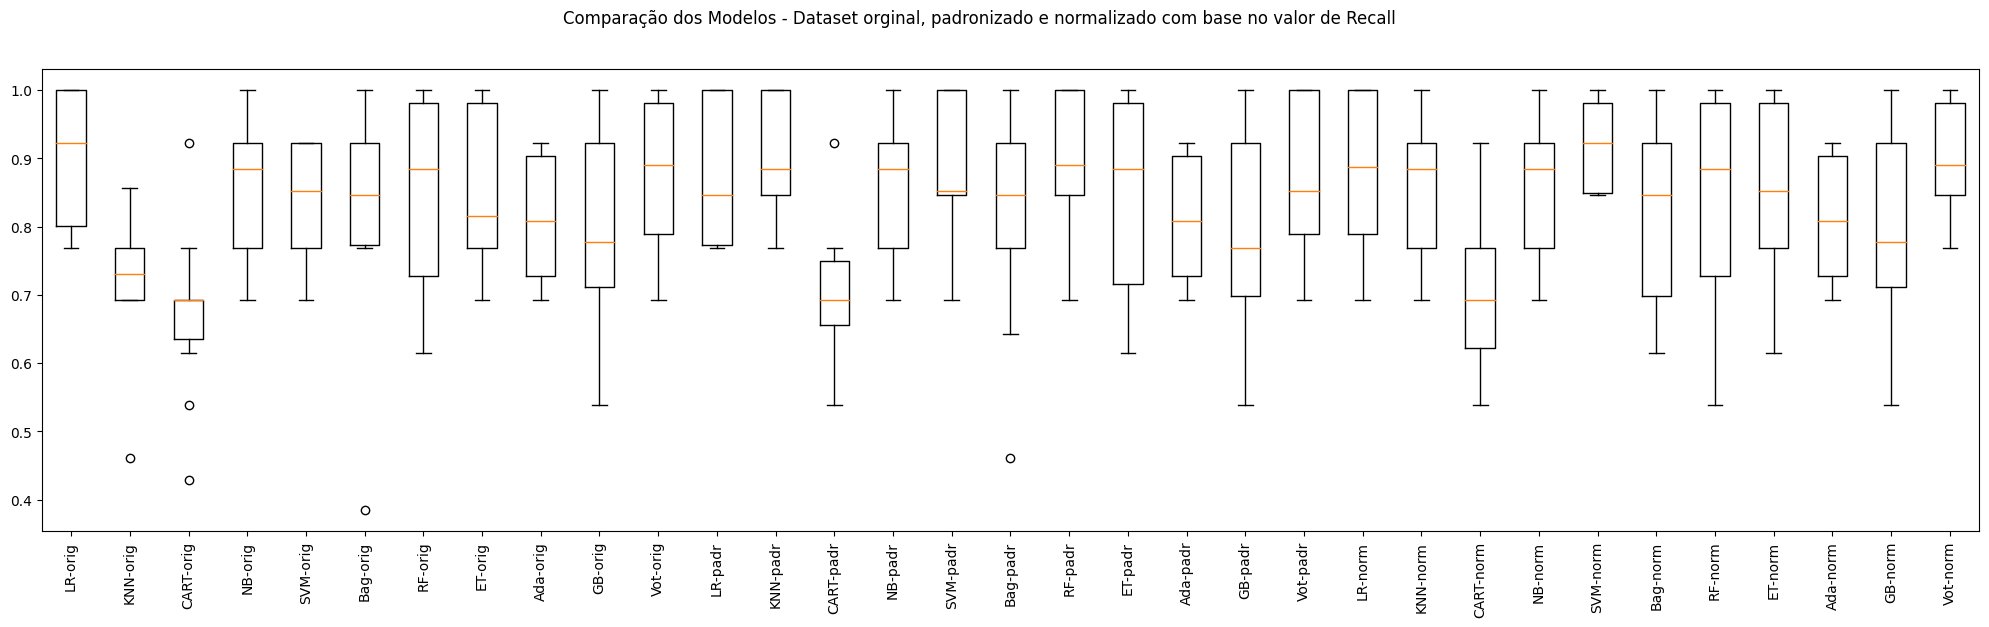

In [7]:
np.random.seed(11) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %.3f (%.3f)' % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado com base no valor de Recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

Após os testes com todos os algoritmos com e sem trasnformações do dataset foi obtido um valor máximo de recall (0.916) para o pipeline usando SVM e dados normalizados.

Com esse resultado foi feito o tuning para otimização dos hiperparâmetros do algoritmo SVM.

Foi observada uma grande melhora para o valor de recall, ficando este igual 0,99 para o SVM normalizado.

In [31]:
# Tuning do SVM

np.random.seed(11) # definindo uma semente global para este bloco

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
Pipeline(steps=[min_max_scaler, svm])
param_grid = {
    'SVM__C': [0.1, 0.5, 1, 1.5, 2, 10, 100],  # Parametro de regularização
    'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # tipo de kernel
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid.fit(X_train, y_train)

# imprime a melhor configuração
print('Melhor recall obtido com: %s - Recall: %.2f usando %s' % (name, grid.best_score_, grid.best_params_))

Melhor recall obtido com: SVM-norm - Recall: 0.99 usando {'SVM__C': 0.1, 'SVM__kernel': 'sigmoid'}


## Finalização do Modelo

In [29]:
# Avaliação do modelo com o conjunto de testes

#Realizando as predições no conjunto de teste com modelo otimizado
predict_SVM =grid.predict(X_test)

#Avaliando o recall do modelo
recall_SVM = recall_score(y_test,predict_SVM)
print('O recall do modelo com parâmetros otimizados para o conjunto de teste foi: %.2f'% recall_SVM)



O recall do modelo com parâmetros otimizados para o conjunto de teste foi: 0.91


Após a aplicação do modelo no conjunto de teste observa-se uma queda no valor do recall, o que pode ser uma possível indicação de overffiting, porém o recall final de 0.91 ou 91% pode ser considerado satisfatório para o modelo desenvolvido.